# Exercise 1

### Exercise 1A

In [ ]:
%pip install gensim

In [ ]:
# Import library
from sklearn.datasets import fetch_20newsgroups
from gensim.models import LdaModel
from gensim import corpora

In [ ]:
# Fetch the dataset
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [ ]:
# Preprocess the data
import nltk
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    tokenized = [token.lower() for token, pos in tagged if token.isalpha() and pos != "IN" and token.lower() not in stop]
    normalized = [lemma.lemmatize(word) for word in tokenized]
    return normalized

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Explaination for preprocess steps used:

Step 1: Tokenization. This step is done through the use of word_tokenize function in the NLTK library. This step will breakdown the text into individual words or tokens. I use this step as it will allows us to treat words as seperate entities.

Step 2: POS tagging. This step is done by using pos_tag function from the NLTK library. I use this step is used to assign part of speech to each token. As a result, it make it possible for automatic text processing tools to consider which part of speech each word is.

Step 3: Lowercasing, Removing Non-Alphabetic Words, and removing Certain POS tag. In this step, I converted all tokens into lowercase as it helps to avoid having multiple copies of the same word such as "The" and "the". I remove non-alphabetic tokens as it helps to focus on the words in the text. Finally, removing certain POS tags can help to remove less informative types of stopwords

Step 4: Stopwords removal. In this step, I perfrom stopwords removal as stopwords normally don't contain important meaning so it's a common practive to remove them from texts.

Step 5: Lemmatization. In this step, words will be reduced to its base or root form. I have done it using the lemmatize function from the NLTK library. The reason that I use this step as it could help to combine different forms of the same word, which allows us to analyze them as a single entity.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Apply preprocessing to all documents
processed_newsgroups = [preprocess(newsgroup) for newsgroup in newsgroups.data]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Create the dictionary and corpus
dictionary = corpora.Dictionary(processed_newsgroups)
corpus = [dictionary.doc2bow(newsgroup) for newsgroup in processed_newsgroups]

In [ ]:
# Train the LDA model and print top 10 topics
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.023*"game" + 0.019*"team" + 0.011*"player" + 0.010*"year" + 0.009*"play"')
(1, '0.013*"one" + 0.012*"get" + 0.009*"would" + 0.008*"car" + 0.008*"know"')
(2, '0.017*"key" + 0.009*"information" + 0.008*"available" + 0.008*"file" + 0.008*"use"')
(3, '0.009*"would" + 0.008*"people" + 0.006*"state" + 0.006*"right" + 0.005*"government"')
(4, '0.076*"max" + 0.055*"q" + 0.047*"g" + 0.045*"r" + 0.038*"p"')
(5, '0.152*"x" + 0.020*"entry" + 0.016*"file" + 0.010*"program" + 0.008*"c"')
(6, '0.012*"god" + 0.012*"one" + 0.011*"would" + 0.008*"people" + 0.007*"think"')
(7, '0.010*"window" + 0.008*"drive" + 0.007*"one" + 0.007*"use" + 0.007*"problem"')
(8, '0.012*"space" + 0.006*"power" + 0.005*"year" + 0.005*"system" + 0.005*"cost"')
(9, '0.021*"armenian" + 0.010*"turkish" + 0.009*"db" + 0.008*"greek" + 0.008*"jew"')


### Exercise 1B

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

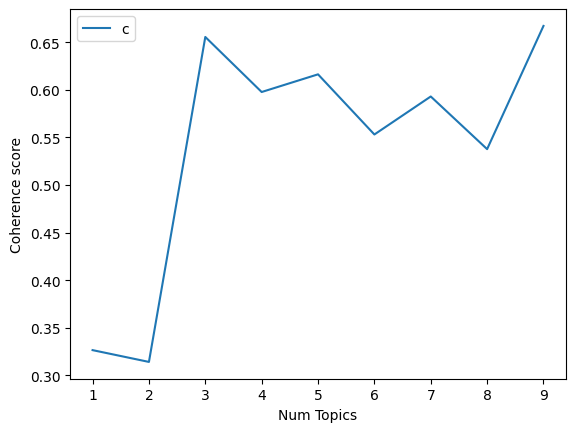

In [ ]:
coherence_scores = []
topic_range = range(1,10)

for topic in topic_range:
  # Build LDA model
  model = LdaModel(corpus, num_topics=topic, id2word=dictionary, passes=15)

  # Calculate coherance score
  coherence_model_lda = CoherenceModel(model=model, texts=processed_newsgroups, dictionary=dictionary, coherence='c_v')
  coherence_score = coherence_model_lda.get_coherence()
  coherence_scores.append(coherence_score)

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

- “Did LDA perform well in identifying topics?”

In my opinion, it seems that the LDA model has done a quite good job of identifying distinct topics. With the score of >0.65 for num_topics to be 10. I think it's a good score. It means that the topics that my LDA model has learned are relatively coherent and interpretable.

This follows a post from StackOverflow which stated that:
"0.3 is considered bad, 0.4 is low, 0.55 is okay, 0.65 might be as good as it is going to get, 0.7 is nice, 0.8 is unlikely, 0.9 is probably wrong" (StackOverflow link: https://stackoverflow.com/questions/54762690/evaluation-of-topic-modeling-how-to-understand-a-coherence-value-c-v-of-0-4)

- "From coherence, how many topics are there in the dataset?”

From the coherence, it's not possible to answer how many topics are there in the dataset the number of topics is a variable to be passed in. However, if we pass the number of topic too low, we can't fit the document into those topics as there are not enough topics. And if we pass the number of topics too high, we will encounter the situation in which there are similar topics. And I think that passing the high number of topic could lead to long fitting time.

From the coherence graph, I think that choosing the number of topics to be 10 seems good in this situation. The reason is that if we choose the number of topic to be 3, I think there are not enough topics. So by choosing the number of topics to be 10, we can have sufficient number of topics to distribute our data into and have acceptable running time.

### Exercise 1C

In [ ]:
for i, row in enumerate(corpus):
    topic_distribution = model.get_document_topics(row)
    print(f"Document {i} has the following topic distribution: {topic_distribution}")

Streaming output truncated to the last 5000 lines.
Document 6314 has the following topic distribution: [(0, 0.011118453), (1, 0.36305436), (2, 0.011115852), (3, 0.011122527), (4, 0.011115852), (5, 0.5591044), (6, 0.011120815), (7, 0.011122161), (8, 0.0111255795)]
Document 6315 has the following topic distribution: [(1, 0.033712894), (3, 0.15780906), (5, 0.68375444), (6, 0.021290759), (7, 0.013073366), (8, 0.08812441)]
Document 6316 has the following topic distribution: [(1, 0.31920135), (5, 0.6469684)]
Document 6317 has the following topic distribution: [(1, 0.9444226)]
Document 6318 has the following topic distribution: [(1, 0.3451686), (5, 0.39418516), (6, 0.22729349)]
Document 6319 has the following topic distribution: [(0, 0.4567258), (5, 0.48768625)]
Document 6320 has the following topic distribution: [(1, 0.11640929), (2, 0.022874737), (5, 0.43138453), (7, 0.41939646)]
Document 6321 has the following topic distribution: [(5, 0.46237302), (7, 0.5312468)]
Document 6322 has the foll

Explaination:
Above is the relationship between the documents and the given topics. It has shown how the document are related to each of the 9 chosen topics. The result is shown in the form of array.

About the question "How are the topics you selected as relevant based on coherence distributed among the documents?", we know that with each documents, it's relationship to the topics varies.

For instance, with document 11313, it has 82% relationship to topic 8 and 14% to topic 6. Comes to document 11311, it has 57% relationship to topic 0, 2.36% relationship to topic 1 and 39% relationship to topic 5. However, the relevance between documents and topics varies across each documents based on coherence.

# Exercise 2

In [ ]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset with 5000 observations and 4 features with 80% positive and 20% negative labels
X, y = make_classification(n_samples=5000, n_features=4,
                           n_informative=4, n_redundant=0,
                           n_repeated=0, n_classes=3,
                           class_sep=2, weights=[0.8, 0.2],
                           random_state=1)

### Exercise 2A: Explain why stratified data splitting could be important in this scenario and show one way it can be implemented in Python with the generated dataset.

Answer: In this scenario, stratified data splitting is important because there is an imbalance in the dataset with 80% of the samples are positive and only 20% of the samples are positive. So by implementing stratified data splitting, it will help to ensures that the distribution of classes will contribute an equal weight to both the training and testing sets which will help to combat class imbalance and prevent bias in model evaluation (as if the model predict only positive for all cases then it could achieve 80% accuracy without stratified data splitting)

In [ ]:
# Way to implement stratified data splitting in Python with the generated dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets while maintaining class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Exercise 2B: Show a way in Python to balance out the dataset using over- or undersampling. Prepare the data for simple hold-out validation.

In [ ]:
# Here I choose to balance out the dataset for undersampling
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class to balance the dataset
sampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = sampler.fit_resample(X, y)

# Split the balanced dataset into training and testing datasets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

### Exercise 2C: Prepare the data for k-fold cross-validation with 3 folds. Train a Naive Bayes classifier with this dataset.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Initialize k-fold cross-validation with 3 folds
k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Perform k-fold cross-valiadation
accuracies = []
for train_index, test_index in k_fold.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Train the classifier
  naive_bayes_classifier.fit(X_train, y_train)

  # Make prediction on the test set
  y_pred = naive_bayes_classifier.predict(X_test)

  # Calcuate the accuracy then add to list to find mean accuracy later
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

avg_accuacy = sum(accuracies)/len(accuracies)
print(f"The accuracy is {avg_accuacy}")

The accuracy is 0.9718005978636205


### Exercise 2D: Explain the concept of nested cross-validation and how it can be used to optimize hyperparameters in a machine learning model. Explain what the risk of using another cross-validation technique, say k-fold cross-validation when tuning hyperparameters.

Answer: Nested cross-validation is a technique used to train a model in which hyperparameters need to be optimized. It includes having an outer loop for model evaluation such as k-fold cross-validation and an inner loop for hyperparameter tuning.

Furthermore, with the outer loop, it splits the data into training and testing sets for model evaluation. And with the inner loop, it is used to further splits the data into training and testing sets for hyperparameter tuning.

The risks of using another cross-validation technique, say k-fold cross-validation when tuning hyperparameters is that it might lead to overfitting as the same data is used to tune the hyperparameters and evaluating the model. However, nested cross-validation limits this risk by having a seperate test set which the model haven't seen during the tuning hyperparameters process

# Exercise 3

### Exercise 3A

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Load data
file_names = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
data = []

for file_name in file_names:
    with open(file_name, 'r') as file:
        data.extend(file.readlines())


# Add data to X(texts) and y(labels)
X = []
y = []

for line in data:
    text, label = line.strip().split('\t')
    X.append(text)
    y.append(int(label))

# Features extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos']))

Accuracy: 0.8266666666666667
Classification Report:
              precision    recall  f1-score   support

         Neg       0.82      0.84      0.83       299
         Pos       0.84      0.81      0.82       301

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



### Exercise 3B
Discuss the result of part A:
- From part A, we found out that the accuracy of the model is about 82.67%
- With the precision (this is the ratio of true positive to the total number of positive predictions), With the precision of 0.84 for 'Pos' and 0.82 for 'Neg', this mean that when the model predict 'Positive', it's correct 84% of the time and when the model predict 'Negative', it's correct 82% of the time.
- With the recall (this is the ratio of true positive to the actual number of positive instances in the dataset), With the recall of 0.81 for 'Pos' and 0.84 for 'Neg', this mean that the model correctly identified 81% of the actual positive statements and the model correctly identified 84% of the actual negative statements.
- With the F1-score (this is the harmonic mean of precision and recall, which shows the balance between those 2 metrics), With the F1-score of 0.82 for 'Pos' and 0.83 for 'Neg', this mean that when the model perform pretty well as the higher F1-score, the better the model.

Affect of adding an extra class:
- Because adding an extra class, like 'neutral' sentiment type besides the existing 2 classes, will make the task more complex (because the model will need to classify 3 types instead of 2).
- Normally, this will make it harder for the model to learn due to the increase in complexity and potential overlap between classes.
- However, depending on the distribution and distingushbility of the new class, there is still chance that the model accuracy could be improve if the introduction of the new class provides more nuanced information. For instance, there might be cases in which the dataset seems to have lots of neutral comments so adding a class called "neutral" will have in that case. But again, it's all up to the dataset that we have and it's the best to have the set of classes that could best represent the dataset.

The need to account for any particular variables/characteristics in the dataset when training your model:
- In this task, the main variable is the text data from the 3 txt files. The characteristics of this data that the model needs to account for include the (1) distribution of words which is handled by the CountVectorizer, (2) the balance between classes, and (3) possibly the length of the sentences

### Exercise 3C
In my opinion, performing 10-fold cross-validation would generally be a good idea. The reason is that:
- 10-fold cross-validation could help with robustness. The reason is that cross-validation could helps in understanding how well the model generalizes unseen data. As a result, it reduces the chance of overfitting by training and testing the model on different subsets of the data
- This cross-validation could increase the stability. By averaging the results from all the folds, we can get a more stable estimate of the model performance. This would be useful when the dataset is not extremely large, as our dataset only have 3000 entries.
- 10-fold cross-validation could provide a good balance in the bias-variance tradeoff The reason is that if we use less folds can lead to a higher bias, while using more folds can lead to a higher variance.

# Exercise 4

### Exercise 4A

In [1]:
from transformers import ElectraForSequenceClassification, ElectraTokenizer

# Load pre-trained ELECTRA model for sequence classification
model = ElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator')
tokenizer = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')

# Print model summary
print("Model Summary:")
print(model)

# Print number of layers
num_layers = model.config.num_hidden_layers
print(f'The model has {num_layers} layers.')

# Print number of parameters
num_parameters = sum(p.numel() for p in model.parameters())
print(f'The model has {num_parameters} parameters.')

# Print layer type
layer_types = [layer.__class__.__name__ for layer in model.base_model.encoder.layer]
print("Layer Types:")
for i, layer_type in enumerate(layer_types, start=1):
    print(f"Layer {i}: {layer_type}")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Model Summary:
ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
          

In [2]:
# Count for each types of layers seperately
# Since we know there are 4 type of layer which are embedding_layers, projection_layer, encoder_layers and classification_head_layers
# We can count for the occurance of each layers

# First, we initialize the layer dictionary
layer_dict = {}

# Then, we create the function to count for the occurance of each layers
def count_layers(model):
  # Count number of layer in embedding layers
  layer_dict['embedding_layers'] = len(list(model.electra.embeddings.children()))

  # Count number of layer in projection layers
  layer_dict['projection_layer'] = 1  # Since we know there's layer of type projection (and there is no model.electra.projection)

  # Count number of layer in encoder layers
  layer_dict['encoder_layers'] = len(list(model.electra.encoder.layer.children()))

  # Count number of layer in classification head layers
  layer_dict['classification_head_layers'] = len(list(model.classifier.children()))

  total_number_layers = sum(layer_dict.values()) # Total number of layers in all kinds
  return total_number_layers, layer_dict

total_layers, layer_types = count_layers(model)
print(f'The model has a total of {total_layers} layers.')
print(f'Layer types and counts: {layer_types}')

The model has a total of 22 layers.
Layer types and counts: {'embedding_layers': 5, 'projection_layer': 1, 'encoder_layers': 12, 'classification_head_layers': 4}


Summary of the model architecture, including the number of layers, number of parameters, and layer types.

This is an ELECTRA model which is a transformer-based model.

It consists different type of layers which are:
* The Embedding Layers (the Embedding Layers consist of the Word Embeddings, Position Embeddings, Token Type Embeddings, LayerNorm and Dropout). There are 5 layers of this kind.
* The next layer is the Projection Layer (This layer is a linear layer called Embeddings Project which projects the Embedding size from 128 to 256 dimensions). There are 1 layers of this kind.
* The next layer is the Electra Encoder which contains 12 identical ElectraLayer. In each of the ElectraLayer, it contain the ElectraAttention which is the attention mechanism with self-attention layers that process the input sequence. On top of that, the ElectraLayer also contains the ElectraIntermediate which is a feed-forward neural network with an activation function that transforms the attention inputs. Finally, we have the ElectraOutput whiich combines the intermediate layer output with the original attention output and applies normalization to it. There are 12 layers of this kind.
* Finally, the model ends with the classification head which makes the classification decision. This attention head contains 4 smaller layers. The first 2 are the Dense layer and the activation function which process the encoder's output. Next, there is a dropout which prevent overfitting. The Output Projection is a linear layer which maps the processed features to the final output size. The out_features of 2 shows that this is a binary classification. There are 4 layers of this kind.

In total, there are 12 main transformer layers (which is within the ElectraEncoder), on top of that, we have multiple embedding layers (5), projection layers (1) and classification layers(4).

This model has 13549314 parameters

The types of layers in this model include embedding layers, linear projection layers, self-attention layers, feed-forward layers, normalization layers, and dropout layers for regularization.

### Exercise 4B

Explain the concept of freezing layers:

Freezing layers in a neural network is a method to prevent the weights in that layer(s) to be updated during the training process. It's done through disabling gradient computation and backpropagation for the weights of these layers. As a consequence, the weights and biases of the frozen layer will be unchanged during the training.

Why it can be useful?

The reason that freezing can be useful is due to several reasons:

- First of all, it can increase the efficiency by reducing the number of computation needed. The reason is that fine-tuning a deep neural network might need lots of time so that by freezing layers, it could help to reduces the number of parameters need to be updated so that reduce the fine-tuning time.
- Second of all, when fine-tuning a pre-trained model on a small dataset, there is a risk of overfitting, especially when the model has a large number of parameters. As a result, freezing layers could help to limit the risk by limiting the ability of the model to adapt to the training data.

In [ ]:
# Freeze all layers but the classification
for name, param in model.named_parameters():
    if 'classifier' not in name:
        param.requires_grad = False

### Exercise 4C: Explain the steps involved in fine-tuning a pre-trained model for a specific NLP classification task. How does the process differ from training a model from scratch?

1. Steps in fine-tuning pre-trained model for specific NLP tasks:

- Step 1. Choose the pre-trained model: In the first step, we should do reasearch to find out which pretrained model is suitable for our task.
- Step 2. Prepare the dataset: In this step, we will prepare the dataset needed for our fine-tuning. Then, we will perform needed preprocessing to make that dataset ready to be used for fine-tuning.
- Step 3. Load the pretrained model: In this step, we will load the pre-trained model. The reason is that this will prepare us with the model that have the knowledge learned from the pre-trained task.
- Step 3a: (Optional) Modify the layers if needed. This step is not required. However, it might be needed. The reason is that for our specific tasks, we might need to add a final layer for instance.
- Step 3b: (Optional) Freeze the layers. As discussed above, if there are pre-trained layers that we want to prevent them from being updated during fine-tuning, we can freeze those layers.
- Step 4: Fine-tune the model. In this step, we will train the pre-trained model on our specific dataset. Depends on our needs, we can update the weight of the model in part or in full. Some methods could be used in this step are gradient descent and backpropagation.
- Step 5: Evaluate the model performance. Now, after fine-tuning, we should evaluate the performance of our model using a seperate dataset to assess how well our model perform for our specific tasks. Some other evaluation methods which could be used are BLEU and BLEURT, but this is totally up to our need.

2. Difference with training model from scratch
- 1. Pre-trained models have already had weights trained from a pre-training process. On the other hand, if we decide to train a model from scratch, we will start with randomly initialized weights.
- 2. Training time is way larger to train models from scratch. The reason is that train models from scratch require much more computational power. In addition, if we train model from scratch, we need to train all of the parameters while with fine-tuning, we can choose to only fine-tune a portion of the model.
- 3. Dataset needed. To train a model from scratch, we normally need a much larger dataset. However, with fine-tuning model, we might only need a fraction of the dataset which focus on our specific tasks.
- 4. Hardware needed. To train a model from scratch, it normally requires much more complex hardware. But to fine-tune models, it could be done with even consumer hardware (For instance, fine-tune 7B LLM could be done with a GPU with less than 16GB of VRAM)
- 5. Generalization. Normally, if we choose to fine-tune a pre-trained model, it often leads to better generalization, especially when the our purpose is similar to the original tasks that the model has been pre-trained on. The reason is that the model has learned features that are transferable across tasks.